<a href="https://colab.research.google.com/github/ab3131/NBAInjuryPredictor/blob/main/NBAInjuryPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Data Cleaning

In [2]:
player_stats = pd.read_csv('player_stats.csv')
injuries_original = pd.read_csv('NBA Player Injury Stats(1951 - 2023).csv')

In [3]:
player_stats.columns[0]


'Unnamed: 0'

In [4]:
injuries_original.columns[0]

'Unnamed: 0'

In [5]:
player_stats = player_stats.drop(columns = player_stats.columns[0], axis=1)

In [6]:
player_stats

player_name team_abbreviation   age  player_height  player_weight  \
0      Randy Livingston               HOU  22.0         193.04      94.800728   
1      Gaylon Nickerson               WAS  28.0         190.50      86.182480   
2          George Lynch               VAN  26.0         203.20     103.418976   
3        George McCloud               LAL  30.0         203.20     102.058200   
4          George Zidek               DEN  23.0         213.36     119.748288   
...                 ...               ...   ...            ...            ...   
12839       Joel Embiid               PHI  29.0         213.36     127.005760   
12840   John Butler Jr.               POR  20.0         213.36      86.182480   
12841      John Collins               ATL  25.0         205.74     102.511792   
12842      Jericho Sims               NYK  24.0         208.28     113.398000   
12843    JaMychal Green               GSW  33.0         205.74     102.965384   

                     college   country draft_year draft_round draft_number  \
0            Louisiana State       USA       1996           2           42   
1      Northwestern Oklahoma       USA       1994           2           34   
2             North Carolina       USA       1993           1           12   
3              Florida State       USA       1989           1            7   
4                       UCLA       USA       1995           1           22   
...                      ...       ...        ...         ...          ...   
12839                 Kansas  Cameroon       2014           1            3   
12840          Florida State       USA  Undrafted   Undrafted    Undrafted   
12841            Wake Forest       USA       2017           1           19   
12842                  Texas       USA       2021           2           58   
12843                Alabama       USA  Undrafted   Undrafted    Undrafted   

       ...   pts   reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  \
0      ...   3.9   1.5  2.4         0.3     0.042     0.071    0.169   0.487   
1      ...   3.8   1.3  0.3         8.9     0.030     0.111    0.174   0.497   
2      ...   8.3   6.4  1.9        -8.2     0.106     0.185    0.175   0.512   
3      ...  10.2   2.8  1.7        -2.7     0.027     0.111    0.206   0.527   
4      ...   2.8   1.7  0.3       -14.1     0.102     0.169    0.195   0.500   
...    ...   ...   ...  ...         ...       ...       ...      ...     ...   
12839  ...  33.1  10.2  4.2         8.8     0.057     0.243    0.370   0.655   
12840  ...   2.4   0.9  0.6       -16.1     0.012     0.065    0.102   0.411   
12841  ...  13.1   6.5  1.2        -0.2     0.035     0.180    0.168   0.593   
12842  ...   3.4   4.7  0.5        -6.7     0.117     0.175    0.074   0.780   
12843  ...   6.4   3.6  0.9        -8.2     0.087     0.164    0.169   0.650   

       ast_pct   season  
0        0.248  1996-97  
1        0.043  1996-97  
2        0.125  1996-97  
3        0.125  1996-97  
4        0.064  1996-97  
...        ...      ...  
12839    0.233  2022-23  
12840    0.066  2022-23  
12841    0.052  2022-23  
12842    0.044  2022-23  
12843    0.094  2022-23  

[12844 rows x 21 columns]

In [7]:
injuries_original = injuries_original.drop(columns=injuries_original.columns[0], axis=1)

In [8]:
injuries_original

Date       Team            Acquired    Relinquished  \
0      1951-12-25    Bullets                 NaN   Don Barksdale   
1      1952-12-26     Knicks                 NaN   Max Zaslofsky   
2      1956-12-29     Knicks                 NaN   Jim Baechtold   
3      1959-01-16     Lakers                 NaN    Elgin Baylor   
4      1961-11-26     Lakers                 NaN    Elgin Baylor   
...           ...        ...                 ...             ...   
37662  2023-04-16   Clippers       Marcus Morris             NaN   
37663  2023-04-16  Grizzlies       Dillon Brooks             NaN   
37664  2023-04-16  Grizzlies           Ja Morant             NaN   
37665  2023-04-16  Grizzlies   Jaren Jackson Jr.             NaN   
37666  2023-04-16  Grizzlies        Santi Aldama             NaN   

                                                   Notes  
0                                           placed on IL  
1                     placed on IL with torn side muscle  
2                                placed on inactive list  
3      player refused to play after being denied a ro...  
4                      player reported for military duty  
...                                                  ...  
37662                                  activated from IL  
37663                                  activated from IL  
37664                                  activated from IL  
37665                                  activated from IL  
37666                                  activated from IL  

[37667 rows x 5 columns]

Filter out injuries prior to 1996, where the player_stats dataset begins. We also don't want any rows where someone was activated, we care about the injury itself

In [9]:
injuries_date_filtered = injuries_original[(injuries_original['Date']>'1996-07-01') & (injuries_original['Date']<'2023-07-01')]

In [10]:
injuries_date_filtered

Date       Team            Acquired            Relinquished  \
2055   1996-09-11     Pacers                 NaN               Rik Smits   
2056   1996-10-30    Blazers                 NaN   Aleksandar Djordjevic   
2057   1996-10-30    Blazers                 NaN         Jermaine O'Neal   
2058   1996-10-30    Blazers                 NaN            Marcus Brown   
2059   1996-10-30     Knicks                 NaN            Chris Childs   
...           ...        ...                 ...                     ...   
37662  2023-04-16   Clippers       Marcus Morris                     NaN   
37663  2023-04-16  Grizzlies       Dillon Brooks                     NaN   
37664  2023-04-16  Grizzlies           Ja Morant                     NaN   
37665  2023-04-16  Grizzlies   Jaren Jackson Jr.                     NaN   
37666  2023-04-16  Grizzlies        Santi Aldama                     NaN   

                                                   Notes  
2055   placed on IR with surgery on feet (date approx...  
2056              placed on IL with sprained right ankle  
2057   placed on IL with sprained left knee / bone co...  
2058              placed on IL with strained right groin  
2059                  placed on IR with broken right leg  
...                                                  ...  
37662                                  activated from IL  
37663                                  activated from IL  
37664                                  activated from IL  
37665                                  activated from IL  
37666                                  activated from IL  

[35612 rows x 5 columns]

In [11]:
injuries = injuries_date_filtered[~(injuries_date_filtered['Relinquished'].isna())]

In [12]:
injuries

Date       Team Acquired            Relinquished  \
2055   1996-09-11     Pacers      NaN               Rik Smits   
2056   1996-10-30    Blazers      NaN   Aleksandar Djordjevic   
2057   1996-10-30    Blazers      NaN         Jermaine O'Neal   
2058   1996-10-30    Blazers      NaN            Marcus Brown   
2059   1996-10-30     Knicks      NaN            Chris Childs   
...           ...        ...      ...                     ...   
37624  2023-04-09  Grizzlies      NaN               Ja Morant   
37625  2023-04-09  Grizzlies      NaN       Jaren Jackson Jr.   
37630  2023-04-09      Kings      NaN         Davion Mitchell   
37631  2023-04-09     Knicks      NaN            Trevor Keels   
37633  2023-04-09      Spurs      NaN            Zach Collins   

                                                   Notes  
2055   placed on IR with surgery on feet (date approx...  
2056              placed on IL with sprained right ankle  
2057   placed on IL with sprained left knee / bone co...  
2058              placed on IL with strained right groin  
2059                  placed on IR with broken right leg  
...                                                  ...  
37624                placed on IL with right hand injury  
37625                  placed on IL with sore left elbow  
37630                   placed on IL with sore left knee  
37631                          placed on IL with illness  
37633                 placed on IL with lacerated finger  

[18892 rows x 5 columns]

In [13]:
injuries = injuries.drop(columns = 'Acquired')

When combining, have to keep date(convert to season?), team, relinquished, and notes

In [14]:
injuries = injuries.reset_index(drop=True)

In [15]:
injuries

Date       Team            Relinquished  \
0      1996-09-11     Pacers               Rik Smits   
1      1996-10-30    Blazers   Aleksandar Djordjevic   
2      1996-10-30    Blazers         Jermaine O'Neal   
3      1996-10-30    Blazers            Marcus Brown   
4      1996-10-30     Knicks            Chris Childs   
...           ...        ...                     ...   
18887  2023-04-09  Grizzlies               Ja Morant   
18888  2023-04-09  Grizzlies       Jaren Jackson Jr.   
18889  2023-04-09      Kings         Davion Mitchell   
18890  2023-04-09     Knicks            Trevor Keels   
18891  2023-04-09      Spurs            Zach Collins   

                                                   Notes  
0      placed on IR with surgery on feet (date approx...  
1                 placed on IL with sprained right ankle  
2      placed on IL with sprained left knee / bone co...  
3                 placed on IL with strained right groin  
4                     placed on IR with broken right leg  
...                                                  ...  
18887                placed on IL with right hand injury  
18888                  placed on IL with sore left elbow  
18889                   placed on IL with sore left knee  
18890                          placed on IL with illness  
18891                 placed on IL with lacerated finger  

[18892 rows x 4 columns]

Separate stats by season for categorization(Season starts on October 12th, ends October 11th of next year)

In [16]:
def find_season(date):
  year = int(date[0:4])
  month = int(date[5:7])
  day = int(date[8:10])
  if month<10:
    return year-1
  elif month==10:
    if day<12:
      return year-1
    else:
      return year
  else:
    return year

In [17]:
injuries['Date'] = injuries['Date'].apply(find_season)

In [18]:
injuries

Date       Team            Relinquished  \
0      1995     Pacers               Rik Smits   
1      1996    Blazers   Aleksandar Djordjevic   
2      1996    Blazers         Jermaine O'Neal   
3      1996    Blazers            Marcus Brown   
4      1996     Knicks            Chris Childs   
...     ...        ...                     ...   
18887  2022  Grizzlies               Ja Morant   
18888  2022  Grizzlies       Jaren Jackson Jr.   
18889  2022      Kings         Davion Mitchell   
18890  2022     Knicks            Trevor Keels   
18891  2022      Spurs            Zach Collins   

                                                   Notes  
0      placed on IR with surgery on feet (date approx...  
1                 placed on IL with sprained right ankle  
2      placed on IL with sprained left knee / bone co...  
3                 placed on IL with strained right groin  
4                     placed on IR with broken right leg  
...                                                  ...  
18887                placed on IL with right hand injury  
18888                  placed on IL with sore left elbow  
18889                   placed on IL with sore left knee  
18890                          placed on IL with illness  
18891                 placed on IL with lacerated finger  

[18892 rows x 4 columns]

In [19]:
def one_year(season):
  return int(season[0:4])

In [20]:
player_stats['season'] = player_stats['season'].apply(one_year)

In [21]:
player_stats

player_name team_abbreviation   age  player_height  player_weight  \
0      Randy Livingston               HOU  22.0         193.04      94.800728   
1      Gaylon Nickerson               WAS  28.0         190.50      86.182480   
2          George Lynch               VAN  26.0         203.20     103.418976   
3        George McCloud               LAL  30.0         203.20     102.058200   
4          George Zidek               DEN  23.0         213.36     119.748288   
...                 ...               ...   ...            ...            ...   
12839       Joel Embiid               PHI  29.0         213.36     127.005760   
12840   John Butler Jr.               POR  20.0         213.36      86.182480   
12841      John Collins               ATL  25.0         205.74     102.511792   
12842      Jericho Sims               NYK  24.0         208.28     113.398000   
12843    JaMychal Green               GSW  33.0         205.74     102.965384   

                     college   country draft_year draft_round draft_number  \
0            Louisiana State       USA       1996           2           42   
1      Northwestern Oklahoma       USA       1994           2           34   
2             North Carolina       USA       1993           1           12   
3              Florida State       USA       1989           1            7   
4                       UCLA       USA       1995           1           22   
...                      ...       ...        ...         ...          ...   
12839                 Kansas  Cameroon       2014           1            3   
12840          Florida State       USA  Undrafted   Undrafted    Undrafted   
12841            Wake Forest       USA       2017           1           19   
12842                  Texas       USA       2021           2           58   
12843                Alabama       USA  Undrafted   Undrafted    Undrafted   

       ...   pts   reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  \
0      ...   3.9   1.5  2.4         0.3     0.042     0.071    0.169   0.487   
1      ...   3.8   1.3  0.3         8.9     0.030     0.111    0.174   0.497   
2      ...   8.3   6.4  1.9        -8.2     0.106     0.185    0.175   0.512   
3      ...  10.2   2.8  1.7        -2.7     0.027     0.111    0.206   0.527   
4      ...   2.8   1.7  0.3       -14.1     0.102     0.169    0.195   0.500   
...    ...   ...   ...  ...         ...       ...       ...      ...     ...   
12839  ...  33.1  10.2  4.2         8.8     0.057     0.243    0.370   0.655   
12840  ...   2.4   0.9  0.6       -16.1     0.012     0.065    0.102   0.411   
12841  ...  13.1   6.5  1.2        -0.2     0.035     0.180    0.168   0.593   
12842  ...   3.4   4.7  0.5        -6.7     0.117     0.175    0.074   0.780   
12843  ...   6.4   3.6  0.9        -8.2     0.087     0.164    0.169   0.650   

       ast_pct  season  
0        0.248    1996  
1        0.043    1996  
2        0.125    1996  
3        0.125    1996  
4        0.064    1996  
...        ...     ...  
12839    0.233    2022  
12840    0.066    2022  
12841    0.052    2022  
12842    0.044    2022  
12843    0.094    2022  

[12844 rows x 21 columns]

In [22]:
injuries = injuries.rename(columns={"Relinquished": "player_name"})
injuries = injuries.rename(columns={"Date": "season"})

In [23]:
injuries

season       Team             player_name  \
0        1995     Pacers               Rik Smits   
1        1996    Blazers   Aleksandar Djordjevic   
2        1996    Blazers         Jermaine O'Neal   
3        1996    Blazers            Marcus Brown   
4        1996     Knicks            Chris Childs   
...       ...        ...                     ...   
18887    2022  Grizzlies               Ja Morant   
18888    2022  Grizzlies       Jaren Jackson Jr.   
18889    2022      Kings         Davion Mitchell   
18890    2022     Knicks            Trevor Keels   
18891    2022      Spurs            Zach Collins   

                                                   Notes  
0      placed on IR with surgery on feet (date approx...  
1                 placed on IL with sprained right ankle  
2      placed on IL with sprained left knee / bone co...  
3                 placed on IL with strained right groin  
4                     placed on IR with broken right leg  
...                                                  ...  
18887                placed on IL with right hand injury  
18888                  placed on IL with sore left elbow  
18889                   placed on IL with sore left knee  
18890                          placed on IL with illness  
18891                 placed on IL with lacerated finger  

[18892 rows x 4 columns]

In [24]:
player_stats['season'] = player_stats['season'].astype(int)
injuries['season'] = injuries['season'].astype(int)
player_stats['player_name'] = player_stats['player_name'].astype(str)
injuries['player_name'] = injuries['player_name'].astype(str)


In [25]:
final = pd.merge( injuries, player_stats, how='outer', left_on=['season', 'player_name'], right_on = ['season', 'player_name'])

In [26]:
final

season     Team             player_name  \
0        1995   Pacers               Rik Smits   
1        1996  Blazers   Aleksandar Djordjevic   
2        1996  Blazers   Aleksandar Djordjevic   
3        1996  Blazers         Jermaine O'Neal   
4        1996  Blazers            Marcus Brown   
...       ...      ...                     ...   
31731    2022      NaN             Joel Embiid   
31732    2022      NaN         John Butler Jr.   
31733    2022      NaN            John Collins   
31734    2022      NaN            Jericho Sims   
31735    2022      NaN          JaMychal Green   

                                                   Notes team_abbreviation  \
0      placed on IR with surgery on feet (date approx...               NaN   
1                 placed on IL with sprained right ankle               NaN   
2                                  placed on IL with flu               NaN   
3      placed on IL with sprained left knee / bone co...               NaN   
4                 placed on IL with strained right groin               NaN   
...                                                  ...               ...   
31731                                                NaN               PHI   
31732                                                NaN               POR   
31733                                                NaN               ATL   
31734                                                NaN               NYK   
31735                                                NaN               GSW   

        age  player_height  player_weight        college   country  ...    gp  \
0       NaN            NaN            NaN            NaN       NaN  ...   NaN   
1       NaN            NaN            NaN            NaN       NaN  ...   NaN   
2       NaN            NaN            NaN            NaN       NaN  ...   NaN   
3       NaN            NaN            NaN            NaN       NaN  ...   NaN   
4       NaN            NaN            NaN            NaN       NaN  ...   NaN   
...     ...            ...            ...            ...       ...  ...   ...   
31731  29.0         213.36     127.005760         Kansas  Cameroon  ...  66.0   
31732  20.0         213.36      86.182480  Florida State       USA  ...  19.0   
31733  25.0         205.74     102.511792    Wake Forest       USA  ...  71.0   
31734  24.0         208.28     113.398000          Texas       USA  ...  52.0   
31735  33.0         205.74     102.965384        Alabama       USA  ...  57.0   

        pts   reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  \
0       NaN   NaN  NaN         NaN       NaN       NaN      NaN     NaN   
1       NaN   NaN  NaN         NaN       NaN       NaN      NaN     NaN   
2       NaN   NaN  NaN         NaN       NaN       NaN      NaN     NaN   
3       NaN   NaN  NaN         NaN       NaN       NaN      NaN     NaN   
4       NaN   NaN  NaN         NaN       NaN       NaN      NaN     NaN   
...     ...   ...  ...         ...       ...       ...      ...     ...   
31731  33.1  10.2  4.2         8.8     0.057     0.243    0.370   0.655   
31732   2.4   0.9  0.6       -16.1     0.012     0.065    0.102   0.411   
31733  13.1   6.5  1.2        -0.2     0.035     0.180    0.168   0.593   
31734   3.4   4.7  0.5        -6.7     0.117     0.175    0.074   0.780   
31735   6.4   3.6  0.9        -8.2     0.087     0.164    0.169   0.650   

       ast_pct  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
...        ...  
31731    0.233  
31732    0.066  
31733    0.052  
31734    0.044  
31735    0.094  

[31736 rows x 23 columns]

pd.merge not giving ideal values, so we will fix this

In [27]:
injuries = injuries.sort_values(by=['season', 'player_name'])

In [28]:
injuries = injuries.reset_index(drop=True)

In [29]:
injuries

season      Team                      player_name  \
0        1995    Pacers                        Rik Smits   
1        1996      Jazz                       Adam Keefe   
2        1996     76ers                  Adrian Caldwell   
3        1996     Hawks                   Alan Henderson   
4        1996   Blazers            Aleksandar Djordjevic   
...       ...       ...                              ...   
18887    2022  Pelicans                  Zion Williamson   
18888    2022  Pelicans                  Zion Williamson   
18889    2022  Pelicans                  Zion Williamson   
18890    2022     Magic           left knee injury (DTD)   
18891    2022    Lakers   strained left quadriceps (DTD)   

                                                   Notes  
0      placed on IR with surgery on feet (date approx...  
1               placed on IR with bruised left hamstring  
2               placed on IR with bursitis in right foot  
3      placed on IR with acute viral pancreatitis / g...  
4                 placed on IL with sprained right ankle  
...                                                  ...  
18887               placed on IL with bruised right foot  
18888  placed on IL with NBA health and safety protocols  
18889  placed on IL with strained right hamstring (ou...  
18890                 placed on IL with left knee injury  
18891         placed on IL with strained left quadriceps  

[18892 rows x 4 columns]

Categorize injuries. Since nltk and spacy turned out to be too unreliable, we are using a for loop to check if it contains it, otherwise categorizing it as "other"

In [30]:
injurylst = ['acl', 'achilles', 'abdom', 'ankle', 'foot', 'knee', 'shoulder', 'finger','thumb', 'nose','heart','neck','head','eye', "wrist", "toe", "feet/hamstring", "calf", "elbow", "groin/disc", "spine", "back", "nail", "chin", "lip", "hand", "leg", "jaw", "cheek", "chest", "collar", "hip", "butt", "waist", "ear", "quadriceps/stomach", "shin", "Achilles", "teeth", "tooth", "abdom", "arm", "tongue", "hair", "scalp"]
for i in range(len(injuries['Notes'])):
  injuries['Notes'][i] = injuries['Notes'][i].lower()
  if any(elem in injuries['Notes'][i] for elem in injurylst):
    for injury in injurylst:
      if injury in injuries['Notes'][i]:
        injuries['Notes'][i] = injury
  else:
    injuries['Notes'][i] = 'other'

Streaming output truncated to the last 5000 lines.
<ipython-input-30-a69f821a8a9c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries['Notes'][i] = injury
<ipython-input-30-a69f821a8a9c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries['Notes'][i] = injuries['Notes'][i].lower()
<ipython-input-30-a69f821a8a9c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries['Notes'][i] = injury
<ipython-input-30-a69f821a8a9c>:3

In [31]:
injuries_lists = injuries.copy()
listtodrop = []
startindex = 1
for i in range(1, len(injuries)):
  injuries_lists['Notes'][i] = [injuries['Notes'][i]]
  if injuries['player_name'][i] == injuries['player_name'][i-1]:
    listtodrop.append(i)
    injuries_lists['Notes'][startindex].append(injuries['Notes'][i])
  else:
    startindex = i
injuries_lists = injuries_lists.drop(listtodrop, axis='index')

Streaming output truncated to the last 5000 lines.
<ipython-input-31-fea5ea898190>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries_lists['Notes'][i] = [injuries['Notes'][i]]
<ipython-input-31-fea5ea898190>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries_lists['Notes'][i] = [injuries['Notes'][i]]
<ipython-input-31-fea5ea898190>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries_lists['Notes'][i] = [injuries['N

In [32]:
injuries_lists['Notes'][0] = [injuries['Notes'][0]]

<ipython-input-32-b782bbbe071c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries_lists['Notes'][0] = [injuries['Notes'][0]]


In [33]:
injuries_lists

season       Team                      player_name  \
0        1995     Pacers                        Rik Smits   
1        1996       Jazz                       Adam Keefe   
2        1996      76ers                  Adrian Caldwell   
3        1996      Hawks                   Alan Henderson   
4        1996    Blazers            Aleksandar Djordjevic   
...       ...        ...                              ...   
18883    2022    Nuggets                       Zeke Nnaji   
18885    2022  Grizzlies                  Ziaire Williams   
18886    2022   Pelicans                  Zion Williamson   
18890    2022      Magic           left knee injury (DTD)   
18891    2022     Lakers   strained left quadriceps (DTD)   

                            Notes  
0                         [other]  
1                         [other]  
2                          [foot]  
3                         [other]  
4                  [ankle, other]  
...                           ...  
18883            [shoulder, knee]  
18885                      [foot]  
18886  [back, foot, other, other]  
18890                      [knee]  
18891                     [other]  

[8077 rows x 4 columns]

In [34]:
injuries_lists['Notes']

0                           [other]
1                           [other]
2                            [foot]
3                           [other]
4                    [ankle, other]
                    ...            
18883              [shoulder, knee]
18885                        [foot]
18886    [back, foot, other, other]
18890                        [knee]
18891                       [other]
Name: Notes, Length: 8077, dtype: object

In [35]:
player_stats = player_stats.sort_values(by = ['season', 'player_name'])

In [36]:
player_stats = player_stats.reset_index(drop=True)

In [37]:
player_stats

player_name team_abbreviation   age  player_height  player_weight  \
0           A.C. Green               DAL  33.0         205.74     102.058200   
1          Aaron McKie               DET  24.0         195.58      94.800728   
2       Aaron Williams               VAN  25.0         205.74     102.058200   
3            Acie Earl               MIL  27.0         210.82     108.862080   
4           Adam Keefe               UTA  27.0         205.74     109.315672   
...                ...               ...   ...            ...            ...   
12839     Zach Collins               SAS  25.0         210.82     113.398000   
12840      Zach LaVine               CHI  28.0         195.58      90.718400   
12841       Zeke Nnaji               DEN  22.0         205.74     108.862080   
12842  Ziaire Williams               MEM  21.0         205.74      83.914520   
12843  Zion Williamson               NOP  22.0         198.12     128.820128   

            college country draft_year draft_round draft_number  ...   pts  \
0      Oregon State     USA       1985           1           23  ...   7.2   
1            Temple     USA       1994           1           17  ...   5.2   
2            Xavier     USA  Undrafted   Undrafted    Undrafted  ...   6.2   
3              Iowa     USA       1993           1           19  ...   4.0   
4          Stanford     USA       1992           1           10  ...   3.8   
...             ...     ...        ...         ...          ...  ...   ...   
12839       Gonzaga     USA       2017           1           10  ...  11.6   
12840          UCLA     USA       2014           1           13  ...  24.8   
12841       Arizona     USA       2020           1           22  ...   5.2   
12842      Stanford     USA       2021           1           10  ...   5.7   
12843          Duke     USA       2019           1            1  ...  26.0   

       reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  \
0      7.9  0.8        -8.0     0.100     0.207    0.119   0.523    0.045   
1      2.7  1.9         5.2     0.031     0.129    0.147   0.524    0.163   
2      4.3  0.5        -8.3     0.129     0.163    0.168   0.599    0.051   
3      2.0  0.4        -6.4     0.079     0.140    0.224   0.435    0.077   
4      3.5  0.5         6.7     0.110     0.177    0.126   0.572    0.051   
...    ...  ...         ...       ...       ...      ...     ...      ...   
12839  6.4  2.9        -7.5     0.076     0.190    0.209   0.599    0.180   
12840  4.5  4.2         0.3     0.016     0.108    0.278   0.607    0.187   
12841  2.6  0.3        -5.9     0.087     0.099    0.149   0.620    0.040   
12842  2.1  0.9        -5.2     0.028     0.105    0.178   0.511    0.086   
12843  7.0  4.6         7.8     0.060     0.148    0.288   0.652    0.231   

       season  
0        1996  
1        1996  
2        1996  
3        1996  
4        1996  
...       ...  
12839    2022  
12840    2022  
12841    2022  
12842    2022  
12843    2022  

[12844 rows x 21 columns]

In [38]:
player_stats['injuries'] = [[] for i in range(len(player_stats))]

In [39]:
player_stats

player_name team_abbreviation   age  player_height  player_weight  \
0           A.C. Green               DAL  33.0         205.74     102.058200   
1          Aaron McKie               DET  24.0         195.58      94.800728   
2       Aaron Williams               VAN  25.0         205.74     102.058200   
3            Acie Earl               MIL  27.0         210.82     108.862080   
4           Adam Keefe               UTA  27.0         205.74     109.315672   
...                ...               ...   ...            ...            ...   
12839     Zach Collins               SAS  25.0         210.82     113.398000   
12840      Zach LaVine               CHI  28.0         195.58      90.718400   
12841       Zeke Nnaji               DEN  22.0         205.74     108.862080   
12842  Ziaire Williams               MEM  21.0         205.74      83.914520   
12843  Zion Williamson               NOP  22.0         198.12     128.820128   

            college country draft_year draft_round draft_number  ...  reb  \
0      Oregon State     USA       1985           1           23  ...  7.9   
1            Temple     USA       1994           1           17  ...  2.7   
2            Xavier     USA  Undrafted   Undrafted    Undrafted  ...  4.3   
3              Iowa     USA       1993           1           19  ...  2.0   
4          Stanford     USA       1992           1           10  ...  3.5   
...             ...     ...        ...         ...          ...  ...  ...   
12839       Gonzaga     USA       2017           1           10  ...  6.4   
12840          UCLA     USA       2014           1           13  ...  4.5   
12841       Arizona     USA       2020           1           22  ...  2.6   
12842      Stanford     USA       2021           1           10  ...  2.1   
12843          Duke     USA       2019           1            1  ...  7.0   

       ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  season  \
0      0.8        -8.0     0.100     0.207    0.119   0.523    0.045    1996   
1      1.9         5.2     0.031     0.129    0.147   0.524    0.163    1996   
2      0.5        -8.3     0.129     0.163    0.168   0.599    0.051    1996   
3      0.4        -6.4     0.079     0.140    0.224   0.435    0.077    1996   
4      0.5         6.7     0.110     0.177    0.126   0.572    0.051    1996   
...    ...         ...       ...       ...      ...     ...      ...     ...   
12839  2.9        -7.5     0.076     0.190    0.209   0.599    0.180    2022   
12840  4.2         0.3     0.016     0.108    0.278   0.607    0.187    2022   
12841  0.3        -5.9     0.087     0.099    0.149   0.620    0.040    2022   
12842  0.9        -5.2     0.028     0.105    0.178   0.511    0.086    2022   
12843  4.6         7.8     0.060     0.148    0.288   0.652    0.231    2022   

       injuries  
0            []  
1            []  
2            []  
3            []  
4            []  
...         ...  
12839        []  
12840        []  
12841        []  
12842        []  
12843        []  

[12844 rows x 22 columns]

In [40]:
injuries_lists

season       Team                      player_name  \
0        1995     Pacers                        Rik Smits   
1        1996       Jazz                       Adam Keefe   
2        1996      76ers                  Adrian Caldwell   
3        1996      Hawks                   Alan Henderson   
4        1996    Blazers            Aleksandar Djordjevic   
...       ...        ...                              ...   
18883    2022    Nuggets                       Zeke Nnaji   
18885    2022  Grizzlies                  Ziaire Williams   
18886    2022   Pelicans                  Zion Williamson   
18890    2022      Magic           left knee injury (DTD)   
18891    2022     Lakers   strained left quadriceps (DTD)   

                            Notes  
0                         [other]  
1                         [other]  
2                          [foot]  
3                         [other]  
4                  [ankle, other]  
...                           ...  
18883            [shoulder, knee]  
18885                      [foot]  
18886  [back, foot, other, other]  
18890                      [knee]  
18891                     [other]  

[8077 rows x 4 columns]

In [41]:
player_stats

player_name team_abbreviation   age  player_height  player_weight  \
0           A.C. Green               DAL  33.0         205.74     102.058200   
1          Aaron McKie               DET  24.0         195.58      94.800728   
2       Aaron Williams               VAN  25.0         205.74     102.058200   
3            Acie Earl               MIL  27.0         210.82     108.862080   
4           Adam Keefe               UTA  27.0         205.74     109.315672   
...                ...               ...   ...            ...            ...   
12839     Zach Collins               SAS  25.0         210.82     113.398000   
12840      Zach LaVine               CHI  28.0         195.58      90.718400   
12841       Zeke Nnaji               DEN  22.0         205.74     108.862080   
12842  Ziaire Williams               MEM  21.0         205.74      83.914520   
12843  Zion Williamson               NOP  22.0         198.12     128.820128   

            college country draft_year draft_round draft_number  ...  reb  \
0      Oregon State     USA       1985           1           23  ...  7.9   
1            Temple     USA       1994           1           17  ...  2.7   
2            Xavier     USA  Undrafted   Undrafted    Undrafted  ...  4.3   
3              Iowa     USA       1993           1           19  ...  2.0   
4          Stanford     USA       1992           1           10  ...  3.5   
...             ...     ...        ...         ...          ...  ...  ...   
12839       Gonzaga     USA       2017           1           10  ...  6.4   
12840          UCLA     USA       2014           1           13  ...  4.5   
12841       Arizona     USA       2020           1           22  ...  2.6   
12842      Stanford     USA       2021           1           10  ...  2.1   
12843          Duke     USA       2019           1            1  ...  7.0   

       ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  season  \
0      0.8        -8.0     0.100     0.207    0.119   0.523    0.045    1996   
1      1.9         5.2     0.031     0.129    0.147   0.524    0.163    1996   
2      0.5        -8.3     0.129     0.163    0.168   0.599    0.051    1996   
3      0.4        -6.4     0.079     0.140    0.224   0.435    0.077    1996   
4      0.5         6.7     0.110     0.177    0.126   0.572    0.051    1996   
...    ...         ...       ...       ...      ...     ...      ...     ...   
12839  2.9        -7.5     0.076     0.190    0.209   0.599    0.180    2022   
12840  4.2         0.3     0.016     0.108    0.278   0.607    0.187    2022   
12841  0.3        -5.9     0.087     0.099    0.149   0.620    0.040    2022   
12842  0.9        -5.2     0.028     0.105    0.178   0.511    0.086    2022   
12843  4.6         7.8     0.060     0.148    0.288   0.652    0.231    2022   

       injuries  
0            []  
1            []  
2            []  
3            []  
4            []  
...         ...  
12839        []  
12840        []  
12841        []  
12842        []  
12843        []  

[12844 rows x 22 columns]

In [42]:
injuries_lists = injuries_lists.reset_index(drop=True)

In [43]:
injuries_lists

season       Team                      player_name  \
0       1995     Pacers                        Rik Smits   
1       1996       Jazz                       Adam Keefe   
2       1996      76ers                  Adrian Caldwell   
3       1996      Hawks                   Alan Henderson   
4       1996    Blazers            Aleksandar Djordjevic   
...      ...        ...                              ...   
8072    2022    Nuggets                       Zeke Nnaji   
8073    2022  Grizzlies                  Ziaire Williams   
8074    2022   Pelicans                  Zion Williamson   
8075    2022      Magic           left knee injury (DTD)   
8076    2022     Lakers   strained left quadriceps (DTD)   

                           Notes  
0                        [other]  
1                        [other]  
2                         [foot]  
3                        [other]  
4                 [ankle, other]  
...                          ...  
8072            [shoulder, knee]  
8073                      [foot]  
8074  [back, foot, other, other]  
8075                      [knee]  
8076                     [other]  

[8077 rows x 4 columns]

In [44]:
for i in range(len(injuries_lists)):
  injuries_lists['player_name'][i] = injuries_lists['player_name'][i][1: len(injuries_lists['player_name'][i])]

Streaming output truncated to the last 5000 lines.
<ipython-input-44-aa281b22cd6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries_lists['player_name'][i] = injuries_lists['player_name'][i][1: len(injuries_lists['player_name'][i])]
<ipython-input-44-aa281b22cd6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries_lists['player_name'][i] = injuries_lists['player_name'][i][1: len(injuries_lists['player_name'][i])]
<ipython-input-44-aa281b22cd6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

In [45]:
player_index= 0
for i in range(1, len(injuries_lists)):
  while player_index<len(player_stats) and player_stats['player_name'][player_index]<=injuries_lists['player_name'][i] and player_stats['season'][player_index]<=injuries_lists['season'][i]:

    if player_stats['player_name'][player_index]==injuries_lists['player_name'][i] and player_stats['season'][player_index]==injuries_lists['season'][i]:
      player_stats['injuries'][player_index] = injuries_lists['Notes'][i]

      player_index+=1
      break
    player_index+=1


Streaming output truncated to the last 5000 lines.
<ipython-input-45-a6ff0d2107e5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_stats['injuries'][player_index] = injuries_lists['Notes'][i]
<ipython-input-45-a6ff0d2107e5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_stats['injuries'][player_index] = injuries_lists['Notes'][i]
<ipython-input-45-a6ff0d2107e5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_st

In [46]:
player_stats['injuries'][12843]

['back', 'foot', 'other', 'other']

In [47]:
player_stats[player_stats['player_name']=='Zion Williamson']['gp']

11158    24
11699    61
12843    29
Name: gp, dtype: int64

# **Correlation Plot**

In [48]:
injuries_num = player_stats.copy()

In [49]:
for i in range(len(injuries_num['injuries'])):
  injuries_num['injuries'][i] = len(injuries_num['injuries'][i])

Streaming output truncated to the last 5000 lines.
<ipython-input-49-97ca074beba8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries_num['injuries'][i] = len(injuries_num['injuries'][i])
<ipython-input-49-97ca074beba8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries_num['injuries'][i] = len(injuries_num['injuries'][i])
<ipython-input-49-97ca074beba8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries_num['injur

In [50]:
injuries_bool = injuries_num.copy()

In [51]:
for i in range(len(injuries_bool['injuries'])):
  if (injuries_bool['injuries'][i])>0:
    injuries_bool['injuries'][i] = 1
  else:
    injuries_bool['injuries'][i] = 0

Streaming output truncated to the last 5000 lines.
<ipython-input-51-f75f2a250c41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries_bool['injuries'][i] = 1
<ipython-input-51-f75f2a250c41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries_bool['injuries'][i] = 1
<ipython-input-51-f75f2a250c41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries_bool['injuries'][i] = 1
<ipython-input-51-f75f2a250c41>:3: SettingWith

In [52]:
injuries_bool

player_name team_abbreviation   age  player_height  player_weight  \
0           A.C. Green               DAL  33.0         205.74     102.058200   
1          Aaron McKie               DET  24.0         195.58      94.800728   
2       Aaron Williams               VAN  25.0         205.74     102.058200   
3            Acie Earl               MIL  27.0         210.82     108.862080   
4           Adam Keefe               UTA  27.0         205.74     109.315672   
...                ...               ...   ...            ...            ...   
12839     Zach Collins               SAS  25.0         210.82     113.398000   
12840      Zach LaVine               CHI  28.0         195.58      90.718400   
12841       Zeke Nnaji               DEN  22.0         205.74     108.862080   
12842  Ziaire Williams               MEM  21.0         205.74      83.914520   
12843  Zion Williamson               NOP  22.0         198.12     128.820128   

            college country draft_year draft_round draft_number  ...  reb  \
0      Oregon State     USA       1985           1           23  ...  7.9   
1            Temple     USA       1994           1           17  ...  2.7   
2            Xavier     USA  Undrafted   Undrafted    Undrafted  ...  4.3   
3              Iowa     USA       1993           1           19  ...  2.0   
4          Stanford     USA       1992           1           10  ...  3.5   
...             ...     ...        ...         ...          ...  ...  ...   
12839       Gonzaga     USA       2017           1           10  ...  6.4   
12840          UCLA     USA       2014           1           13  ...  4.5   
12841       Arizona     USA       2020           1           22  ...  2.6   
12842      Stanford     USA       2021           1           10  ...  2.1   
12843          Duke     USA       2019           1            1  ...  7.0   

       ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  season  \
0      0.8        -8.0     0.100     0.207    0.119   0.523    0.045    1996   
1      1.9         5.2     0.031     0.129    0.147   0.524    0.163    1996   
2      0.5        -8.3     0.129     0.163    0.168   0.599    0.051    1996   
3      0.4        -6.4     0.079     0.140    0.224   0.435    0.077    1996   
4      0.5         6.7     0.110     0.177    0.126   0.572    0.051    1996   
...    ...         ...       ...       ...      ...     ...      ...     ...   
12839  2.9        -7.5     0.076     0.190    0.209   0.599    0.180    2022   
12840  4.2         0.3     0.016     0.108    0.278   0.607    0.187    2022   
12841  0.3        -5.9     0.087     0.099    0.149   0.620    0.040    2022   
12842  0.9        -5.2     0.028     0.105    0.178   0.511    0.086    2022   
12843  4.6         7.8     0.060     0.148    0.288   0.652    0.231    2022   

       injuries  
0             0  
1             0  
2             0  
3             0  
4             1  
...         ...  
12839         1  
12840         1  
12841         1  
12842         1  
12843         1  

[12844 rows x 22 columns]

In [53]:
injuries_bool['injuries'] = injuries_bool['injuries'].astype(int)

In [54]:
injuries_bool.dtypes

player_name           object
team_abbreviation     object
age                  float64
player_height        float64
player_weight        float64
college               object
country               object
draft_year            object
draft_round           object
draft_number          object
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                 int64
injuries               int64
dtype: object

In [55]:
injuries_num['injuries'] = injuries_num['injuries'].astype(int)

In [56]:
correlation_plot = injuries_bool.select_dtypes('number').corr()
correlation_plot.style.background_gradient(cmap='coolwarm')


In [57]:
correlation_plot = injuries_num.select_dtypes('number').corr()
correlation_plot.style.background_gradient(cmap='coolwarm')

# **Base ML Models**

In [58]:
injuries_bool = injuries_bool.select_dtypes('number')

In [104]:
train_bool, valid_bool, test_bool = np.split(injuries_bool.sample(frac=1), [int(0.6*len(injuries_bool)), int(0.8*len(injuries_bool))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [60]:
len(injuries_bool[injuries_bool["injuries"]==0])

9087

In [61]:
len(injuries_bool[injuries_bool["injuries"]==1])

3757

Need oversampling because of lack of players with injuries

In [62]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [63]:
def scale(dataframe, oversample = False):
   X = dataframe[dataframe.columns[:-1]].values
   y = dataframe[dataframe.columns[-1]].values

   if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

   data = dataframe.copy()
   data = np.hstack((X, np.reshape(y, (-1, 1))))

   return data, X, y

In [64]:
train_bool, x_train_bool, y_train_bool = scale(train_bool, oversample = True)

In [65]:
valid_bool, x_valid_bool, y_valid_bool = scale(valid_bool, oversample = True)

In [66]:
test_bool, x_test_bool, y_test_bool = scale(test_bool, oversample = True)

Naive Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB

In [68]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train_bool, y_train_bool)

In [69]:
y_pred = nb_model.predict(x_test_bool)
print(classification_report(y_test_bool, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.46      0.49      1799
           1       0.53      0.60      0.56      1799

    accuracy                           0.53      3598
   macro avg       0.53      0.53      0.53      3598
weighted avg       0.53      0.53      0.53      3598



Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train_bool, y_train_bool)

In [72]:
y_pred = lg_model.predict(x_test_bool)
print(classification_report(y_test_bool, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.58      0.55      1799
           1       0.54      0.49      0.51      1799

    accuracy                           0.53      3598
   macro avg       0.53      0.53      0.53      3598
weighted avg       0.53      0.53      0.53      3598



SVM

In [73]:
from sklearn.svm import SVC

In [74]:
svm_model = SVC()
svm_model = svm_model.fit(x_train_bool, y_train_bool)

In [75]:
y_pred = svm_model.predict(x_test_bool)
print(classification_report(y_test_bool, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.68      0.59      1799
           1       0.54      0.38      0.44      1799

    accuracy                           0.53      3598
   macro avg       0.53      0.53      0.52      3598
weighted avg       0.53      0.53      0.52      3598



KNN

In [76]:
from sklearn.neighbors import KNeighborsClassifier


In [77]:
neighbors = 1
knn_model = KNeighborsClassifier(n_neighbors = neighbors)
knn_model.fit(x_train_bool, y_train_bool)

KNeighborsClassifier(n_neighbors=1)

In [78]:
y_pred = knn_model.predict(x_test_bool)
print(classification_report(y_test_bool, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.74      0.63      1799
           1       0.60      0.40      0.48      1799

    accuracy                           0.57      3598
   macro avg       0.58      0.57      0.56      3598
weighted avg       0.58      0.57      0.56      3598



RandomForest

In [79]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=40)
rfc_model.fit(x_train_bool, y_train_bool)

RandomForestClassifier(n_estimators=40)

In [80]:
y_pred = rfc_model.predict(x_test_bool)
print(classification_report(y_test_bool, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.90      0.77      1799
           1       0.85      0.55      0.67      1799

    accuracy                           0.72      3598
   macro avg       0.76      0.72      0.72      3598
weighted avg       0.76      0.72      0.72      3598



RandomForest without Oversampling

In [105]:
train_bool, x_train_bool, y_train_bool = scale(pd.DataFrame(train_bool))
valid_bool, x_valid_bool, y_valid_bool = scale(pd.DataFrame(valid_bool))
test_bool, x_test_bool, y_test_bool = scale(pd.DataFrame(test_bool))

In [101]:
test = pd.DataFrame(y_train_bool)

In [106]:
np.count_nonzero(y_train_bool)

2266

In [107]:
len(y_train_bool)

7706

In [108]:
rfc_model = RandomForestClassifier(n_estimators=40)
rfc_model.fit(x_train_bool, y_train_bool)
y_pred = rfc_model.predict(x_test_bool)
print(classification_report(y_test_bool, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1808
           1       0.74      0.43      0.55       761

    accuracy                           0.79      2569
   macro avg       0.77      0.68      0.70      2569
weighted avg       0.78      0.79      0.77      2569



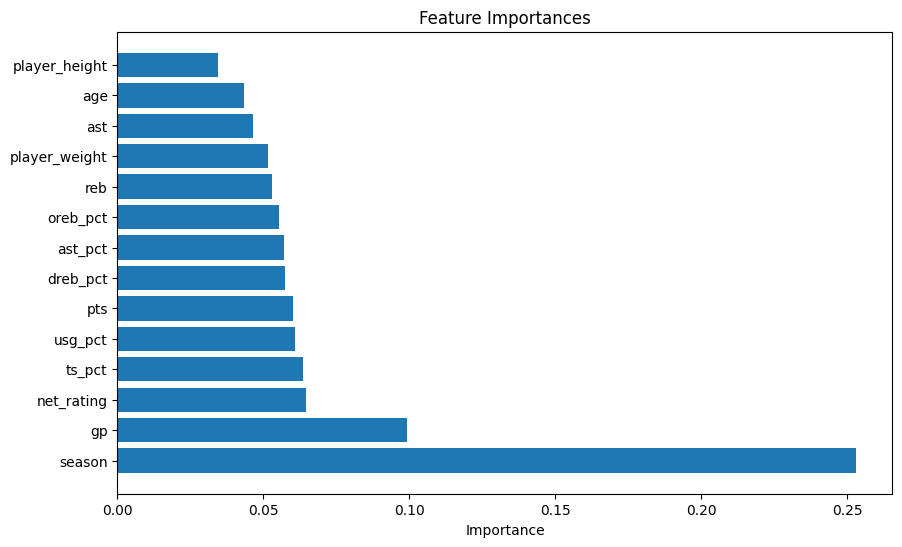

In [113]:
feature_names = injuries_bool.columns[:-1]
importances = rfc_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

Plot injuries season-over-season

LDA

In [81]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(x_train_bool, y_train_bool)

LinearDiscriminantAnalysis()

In [83]:
y_pred = lda_model.predict(x_test_bool)
print(classification_report(y_test_bool, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.60      0.56      1799
           1       0.54      0.48      0.51      1799

    accuracy                           0.54      3598
   macro avg       0.54      0.54      0.54      3598
weighted avg       0.54      0.54      0.54      3598



# **Association Rule Mining**

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
injuries_bool

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


age  player_height  player_weight  gp   pts  reb  ast  net_rating  \
0      33.0         205.74     102.058200  83   7.2  7.9  0.8        -8.0   
1      24.0         195.58      94.800728  83   5.2  2.7  1.9         5.2   
2      25.0         205.74     102.058200  33   6.2  4.3  0.5        -8.3   
3      27.0         210.82     108.862080  47   4.0  2.0  0.4        -6.4   
4      27.0         205.74     109.315672  62   3.8  3.5  0.5         6.7   
...     ...            ...            ...  ..   ...  ...  ...         ...   
12839  25.0         210.82     113.398000  63  11.6  6.4  2.9        -7.5   
12840  28.0         195.58      90.718400  77  24.8  4.5  4.2         0.3   
12841  22.0         205.74     108.862080  53   5.2  2.6  0.3        -5.9   
12842  21.0         205.74      83.914520  37   5.7  2.1  0.9        -5.2   
12843  22.0         198.12     128.820128  29  26.0  7.0  4.6         7.8   

       oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  season  injuries  
0         0.100     0.207    0.119   0.523    0.045    1996         0  
1         0.031     0.129    0.147   0.524    0.163    1996         0  
2         0.129     0.163    0.168   0.599    0.051    1996         0  
3         0.079     0.140    0.224   0.435    0.077    1996         0  
4         0.110     0.177    0.126   0.572    0.051    1996         1  
...         ...       ...      ...     ...      ...     ...       ...  
12839     0.076     0.190    0.209   0.599    0.180    2022         1  
12840     0.016     0.108    0.278   0.607    0.187    2022         1  
12841     0.087     0.099    0.149   0.620    0.040    2022         1  
12842     0.028     0.105    0.178   0.511    0.086    2022         1  
12843     0.060     0.148    0.288   0.652    0.231    2022         1  

[12844 rows x 15 columns]

In [ ]:
arm = injuries_bool.copy()
for column in arm.columns:
  for i in range(len(arm)):
    if arm[column][i]>=arm[column].mean():
      arm[column][i] = 1
    else:
      arm[column][i] = 0


Streaming output truncated to the last 5000 lines.
<ipython-input-98-a1efcd626ea7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arm[column][i] = 1
<ipython-input-98-a1efcd626ea7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arm[column][i] = 1
<ipython-input-98-a1efcd626ea7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arm[column][i] = 1
<ipython-input-98-a1efcd626ea7>:5: SettingWithCopyWarning: 
A value is trying to be set 

In [ ]:
arm

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


age  player_height  player_weight  gp  pts  reb  ast  net_rating  \
0      1.0            1.0            1.0   1  0.0  1.0  0.0         0.0   
1      0.0            0.0            0.0   1  0.0  0.0  1.0         1.0   
2      0.0            1.0            1.0   0  0.0  1.0  0.0         0.0   
3      0.0            1.0            1.0   0  0.0  0.0  0.0         0.0   
4      0.0            1.0            1.0   1  0.0  0.0  0.0         1.0   
...    ...            ...            ...  ..  ...  ...  ...         ...   
12839  1.0            1.0            1.0   1  1.0  1.0  1.0         0.0   
12840  1.0            1.0            1.0   1  1.0  1.0  1.0         0.0   
12841  1.0            1.0            1.0   1  1.0  1.0  0.0         0.0   
12842  1.0            1.0            1.0   1  1.0  1.0  1.0         0.0   
12843  1.0            1.0            1.0   1  1.0  1.0  1.0         1.0   

       oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  season  injuries  
0           1.0       1.0      0.0     1.0      0.0       0         0  
1           0.0       0.0      0.0     1.0      1.0       0         0  
2           1.0       1.0      0.0     1.0      0.0       0         0  
3           1.0       0.0      1.0     0.0      0.0       0         0  
4           1.0       1.0      0.0     1.0      0.0       0         1  
...         ...       ...      ...     ...      ...     ...       ...  
12839       0.0       0.0      0.0     1.0      0.0       1         1  
12840       0.0       0.0      1.0     1.0      0.0       1         1  
12841       0.0       0.0      0.0     1.0      0.0       1         1  
12842       0.0       0.0      0.0     0.0      0.0       1         1  
12843       0.0       0.0      1.0     1.0      1.0       1         1  

[12844 rows x 15 columns]

In [ ]:
arm_sets = apriori(arm, min_support = 0.1, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
arm_rules = association_rules(arm_sets, metric= 'lift', min_threshold = 1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
arm_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents                                        consequents  \
0       (player_height)                                              (age)   
1                 (age)                                    (player_height)   
2                 (age)                                    (player_weight)   
3       (player_weight)                                              (age)   
4                  (gp)                                              (age)   
...                 ...                                                ...   
121571            (reb)  (player_height, age, net_rating, season, gp, t...   
121572         (ts_pct)  (player_height, age, net_rating, season, gp, r...   
121573  (player_weight)  (player_height, age, net_rating, season, gp, r...   
121574            (pts)  (player_height, age, net_rating, season, gp, r...   
121575            (ast)  (player_height, age, net_rating, season, gp, r...   

        antecedent support  consequent support   support  confidence  \
0                 0.981159            0.949704  0.937948    0.955959   
1                 0.949704            0.981159  0.937948    0.987621   
2                 0.949704            0.947680  0.911554    0.959829   
3                 0.947680            0.949704  0.911554    0.961880   
4                 0.798038            0.949704  0.769620    0.964390   
...                    ...                 ...       ...         ...   
121571            0.687013            0.191529  0.179228    0.260879   
121572            0.544534            0.223451  0.179228    0.329139   
121573            0.947680            0.181408  0.179228    0.189123   
121574            0.675335            0.180473  0.179228    0.265391   
121575            0.547415            0.229991  0.179228    0.327407   

            lift  leverage  conviction  zhangs_metric  
0       1.006587  0.006137    1.142033       0.347287  
1       1.006587  0.006137    1.522042       0.130098  
2       1.012820  0.011539    1.302451       0.251673  
3       1.012820  0.011539    1.319399       0.241936  
4       1.015464  0.011720    1.412418       0.075402  
...          ...       ...         ...            ...  
121571  1.362088  0.047645    1.093828       0.849342  
121572  1.472984  0.057551    1.157542       0.705006  
121573  1.042528  0.007311    1.009514       0.779684  
121574  1.470526  0.057348    1.115595       0.985542  
121575  1.423567  0.053327    1.144837       0.657422  

[121576 rows x 10 columns]

In [ ]:
arm_result_injuries = arm_rules[arm_rules['consequents']==frozenset({'injuries'})]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
arm_result_injuries[(arm_result_injuries['confidence']>=0.29) & (arm_result_injuries['lift']>1.001)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents consequents  \
35884                  (age, gp, reb, player_weight, ast)  (injuries)   
37536                 (age, reb, player_weight, pts, ast)  (injuries)   
58358   (player_height, age, gp, reb, player_weight, ast)  (injuries)   
61758   (player_height, age, reb, player_weight, pts, ...  (injuries)   
66324             (player_height, age, gp, reb, pts, ast)  (injuries)   
72507             (age, gp, reb, player_weight, pts, ast)  (injuries)   
75599          (age, season, gp, reb, player_weight, ast)  (injuries)   
76977         (age, season, reb, player_weight, pts, ast)  (injuries)   
91195   (player_height, age, gp, reb, player_weight, p...  (injuries)   
97463   (player_height, age, season, gp, reb, player_w...  (injuries)   
100249  (player_height, age, season, reb, player_weigh...  (injuries)   
106580    (age, season, gp, reb, player_weight, pts, ast)  (injuries)   
115464  (player_height, age, season, gp, reb, player_w...  (injuries)   

        antecedent support  consequent support   support  confidence  \
35884             0.416615             0.29251  0.122236    0.293403   
37536             0.425646             0.29251  0.125117    0.293945   
58358             0.416459             0.29251  0.122158    0.293326   
61758             0.425491             0.29251  0.125039    0.293870   
66324             0.415525             0.29251  0.121691    0.292861   
72507             0.411398             0.29251  0.120990    0.294095   
75599             0.415992             0.29251  0.122002    0.293281   
76977             0.425023             0.29251  0.124883    0.293827   
91195             0.411320             0.29251  0.120990    0.294151   
97463             0.415914             0.29251  0.121925    0.293149   
100249            0.424945             0.29251  0.124805    0.293697   
106580            0.410775             0.29251  0.120757    0.293973   
115464            0.410775             0.29251  0.120757    0.293973   

            lift  leverage  conviction  zhangs_metric  
35884   1.003053  0.000372    1.001264       0.005217  
37536   1.004907  0.000611    1.002033       0.008502  
58358   1.002789  0.000340    1.001154       0.004766  
61758   1.004649  0.000579    1.001926       0.008055  
66324   1.001200  0.000146    1.000496       0.002051  
72507   1.005420  0.000652    1.002246       0.009158  
75599   1.002635  0.000321    1.001091       0.004500  
76977   1.004501  0.000560    1.001864       0.007793  
91195   1.005610  0.000675    1.002325       0.009476  
97463   1.002183  0.000266    1.000903       0.003729  
100249  1.004059  0.000504    1.001681       0.007029  
106580  1.005000  0.000601    1.002072       0.008444  
115464  1.005000  0.000601    1.002072       0.008444

Look at other papers, see what results they got(which classifiers/data they used);
Add other datasets;
Try with non-numeric;
Find some variables that could be correlated, or teams have discussed(Wisdom that relates to certain things);
ethnicity, country, etc;
**Later**: Artificially create data; maybe add minutes played